This program will read a csv file of 311 data to a dataframe.
The dataframe will be cleaned as such: Remove all data other than the year 2017

The results will be stored to a new csv file.

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import time
%matplotlib inline

In [2]:
# df311 = pd.read_csv('311cleaned.csv')
# dfwx = pd.read_csv('311weather.csv')
# df = pd.merge(df311, dfwx,  left_on='REQUEST_ID', right_on='REQUEST_ID', how='left')  
# saved merged data to 311Master.csv to save time loading
df = pd.read_csv('311Master.csv')

In [3]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,79852.000000,79852.000000,76069.000000,75965.000000,7.612800e+04,75966.000000,75965.000000,75922.000000,76784.000000,76784.000000,...,76128.000000,7.612800e+04,7.612800e+04,76128.000000,7.612800e+04,76128.000000,76128.000000,76128.000000,7.612800e+04,76128.000000
mean,164666.873704,1.176514,4.882370,16.369157,4.200323e+10,3.029619,16.369157,3.550815,-79.289558,40.095406,...,48.345240,1.498402e+09,1.498365e+09,5.256568,1.498409e+09,9.378755,215.086381,9.185279,1.498414e+09,1.507024
std,23625.934393,0.703213,2.571621,8.025851,1.887250e+05,1.461813,8.025851,1.607305,7.360487,3.722107,...,15.309816,8.216627e+06,8.216940e+06,2.402328,8.216563e+06,0.871242,74.410305,4.469073,8.218056e+06,1.140489
min,123268.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,0.980000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,144463.750000,1.000000,3.000000,10.000000,4.200311e+10,2.000000,10.000000,2.000000,-80.007287,40.421424,...,37.270000,1.491966e+09,1.491883e+09,3.000000,1.491937e+09,9.080000,186.000000,5.690000,1.491926e+09,0.700000
50%,164863.500000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977465,40.444844,...,51.310000,1.498471e+09,1.498450e+09,5.000000,1.498489e+09,9.760000,224.000000,8.720000,1.498511e+09,1.290000
75%,185093.250000,1.000000,7.000000,22.000000,4.200328e+10,5.000000,22.000000,5.000000,-79.934367,40.461995,...,60.900000,1.504753e+09,1.504670e+09,7.000000,1.504714e+09,10.000000,266.000000,11.560000,1.504750e+09,2.080000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.526962,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.410000,1.514696e+09,6.150000


In [4]:
df.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
0,205290,2017-12-31T23:17:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,Marshall-Shadeland,1.0,27.0,4.200327e+10,...,1.99,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,264.0,5.32,1.514696e+09,0.57
1,205289,2017-12-31T22:01:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.51
2,205288,2017-12-31T21:55:00,Snow/Ice removal,Website,1,DPW - Street Maintenance,New Homestead,5.0,31.0,4.200331e+10,...,1.76,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,257.0,5.38,1.514696e+09,0.63
3,205287,2017-12-31T18:23:00,Missed Pick Up,Website,1,DPW - Refuse,Mount Washington,2.0,19.0,4.200319e+10,...,1.50,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.09,262.0,5.35,1.514696e+09,0.55
4,205286,2017-12-31T17:56:00,Snow/Ice removal,Report2Gov iOS,1,DPW - Street Maintenance,Stanton Heights,9.0,10.0,4.200310e+10,...,1.57,1.514722e+09,1.514696e+09,1.0,1.514732e+09,9.06,265.0,5.27,1.514696e+09,0.52


In [5]:
df.columns

Index(['REQUEST_ID', 'CREATED_ON', 'REQUEST_TYPE', 'REQUEST_ORIGIN', 'STATUS',
       'DEPARTMENT', 'NEIGHBORHOOD', 'COUNCIL_DISTRICT', 'WARD', 'TRACT',
       'PUBLIC_WORKS_DIVISION', 'PLI_DIVISION', 'POLICE_ZONE', 'FIRE_ZONE',
       'X', 'Y', 'GEO_ACCURACY', 'current.apparentTemperature',
       'current.cloudCover', 'current.dewPoint', 'current.humidity',
       'current.icon', 'current.precipIntensity', 'current.precipProbability',
       'current.precipType', 'current.pressure', 'current.summary',
       'current.temperature', 'current.time', 'current.uvIndex',
       'current.visibility', 'current.windBearing', 'current.windGust',
       'current.windSpeed', 'daily.apparentTemperatureHigh',
       'daily.apparentTemperatureHighTime', 'daily.apparentTemperatureLow',
       'daily.apparentTemperatureLowTime', 'daily.apparentTemperatureMax',
       'daily.apparentTemperatureMaxTime', 'daily.apparentTemperatureMin',
       'daily.apparentTemperatureMinTime', 'daily.cloudCover',
    

In [6]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4068
Abandoned Vehicle (parked on street)    2633
Litter                                  1916
Refuse Violations                       1839
Illegal Parking                         1784
Missed Pick Up                          1735
Referral                                1565
Replace/Repair a Sign                   1554
City Source (CDBG)                      1500
Street Light - Repair                   1458
Building Without a Permit               1442
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           985
Question                                 918
Need Potable Water                       857
Fire Safety System Not Working           821
Dead Anima

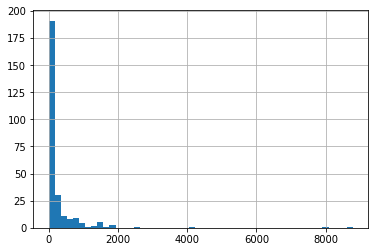

In [7]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).hist(bins=50)

In [8]:
# remove all call types with less than 500 incidences
s = df['REQUEST_TYPE'].value_counts()
df = df[df.isin(s.index[s >= 500]).values]

In [9]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False) 

Potholes                                8787
Weeds/Debris                            7933
Building Maintenance                    4068
Abandoned Vehicle (parked on street)    2633
Litter                                  1916
Refuse Violations                       1839
Illegal Parking                         1784
Missed Pick Up                          1735
Referral                                1565
Replace/Repair a Sign                   1554
City Source (CDBG)                      1500
Street Light - Repair                   1458
Building Without a Permit               1442
Vacant Building                         1264
Paving Request                          1260
Overgrowth                              1211
Snow/Ice removal                        1050
Pruning (city tree)                     1032
Rodent control                           985
Question                                 918
Need Potable Water                       857
Fire Safety System Not Working           821
Dead Anima

In [10]:
df.describe()

,REQUEST_ID,STATUS,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,X,Y,...,daily.temperatureMin,daily.temperatureMinTime,daily.time,daily.uvIndex,daily.uvIndexTime,daily.visibility,daily.windBearing,daily.windGust,daily.windGustTime,daily.windSpeed
count,57586.000000,57586.000000,54487.000000,54430.000000,5.453400e+04,54433.000000,54430.000000,54404.000000,54924.000000,54924.000000,...,54534.000000,5.453400e+04,5.453400e+04,54534.000000,5.453400e+04,54534.000000,54534.000000,54534.000000,5.453400e+04,54534.000000
mean,163689.935279,1.183100,4.896012,16.521202,4.200323e+10,3.024985,16.521202,3.567385,-79.404789,40.153593,...,48.328882,1.498055e+09,1.498019e+09,5.273261,1.498063e+09,9.373595,215.866854,9.247144,1.498068e+09,1.524998
std,23563.576057,0.701273,2.585238,8.005302,1.826824e+05,1.452966,8.005302,1.610822,6.715203,3.395793,...,15.317599,8.181299e+06,8.181773e+06,2.411958,8.181510e+06,0.869473,73.924376,4.509321,8.183161e+06,1.157011
min,123269.000000,0.000000,1.000000,0.000000,4.200301e+10,0.000000,0.000000,1.000000,-80.088105,0.000000,...,1.160000,1.483276e+09,1.483247e+09,1.000000,1.483290e+09,3.780000,0.000000,1.460000,1.483247e+09,0.020000
25%,143353.500000,1.000000,3.000000,11.000000,4.200311e+10,2.000000,11.000000,2.000000,-80.007275,40.420736,...,37.250000,1.491390e+09,1.491365e+09,3.000000,1.491412e+09,9.050000,187.000000,5.710000,1.491437e+09,0.710000
50%,163688.500000,1.000000,5.000000,16.000000,4.200318e+10,3.000000,16.000000,4.000000,-79.977669,40.445323,...,51.290000,1.498036e+09,1.498018e+09,5.000000,1.498061e+09,9.750000,224.000000,8.770000,1.498068e+09,1.300000
75%,183764.750000,1.000000,7.000000,22.000000,4.200329e+10,5.000000,22.000000,5.000000,-79.934506,40.462167,...,60.910000,1.504091e+09,1.504066e+09,7.000000,1.504112e+09,10.000000,267.000000,11.590000,1.504112e+09,2.100000
max,205290.000000,3.000000,9.000000,32.000000,4.200398e+10,6.000000,32.000000,6.000000,0.000000,40.526485,...,73.950000,1.514722e+09,1.514696e+09,10.000000,1.514732e+09,10.000000,359.000000,26.410000,1.514696e+09,6.150000


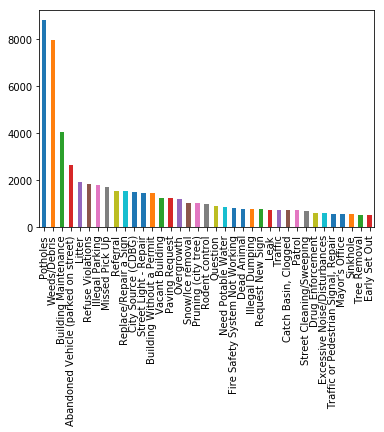

In [11]:
df['REQUEST_TYPE'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

In [8]:
df['REQUEST_ORIGIN'].value_counts(sort=True, ascending=False, dropna=False)

Call Center           37234
Website                9590
Control Panel          6770
Report2Gov iOS         1633
Twitter                1235
Text Message            605
Report2Gov Android      506
Report2Gov Website        6
QAlert Mobile iOS         5
Email                     2
Name: REQUEST_ORIGIN, dtype: int64

In [12]:
df['CREATED_ON'].value_counts(sort=True, ascending=False, dropna=False)

2017-05-01T14:02:00    8
2017-02-01T12:44:00    6
2017-03-07T11:25:00    6
2017-08-27T19:12:00    6
2017-02-01T12:59:00    5
2017-08-27T19:10:00    5
2017-08-03T11:09:00    5
2017-10-20T11:06:00    5
2017-02-01T14:26:00    5
2017-06-06T10:43:00    5
2017-03-09T11:10:00    5
2017-04-20T12:54:00    5
2017-08-02T11:52:00    5
2017-03-07T14:38:00    5
2017-08-21T11:03:00    5
2017-03-08T11:30:00    5
2017-03-29T15:01:00    5
2017-03-08T08:31:00    5
2017-08-02T09:20:00    5
2017-08-03T11:02:00    5
2017-04-17T11:18:00    5
2017-07-07T08:19:00    5
2017-03-07T11:35:00    5
2017-03-07T10:47:00    5
2017-02-01T13:29:00    5
2017-03-07T14:53:00    5
2017-03-07T12:15:00    5
2017-02-01T12:50:00    5
2017-09-19T10:17:00    5
2017-05-31T12:33:00    5
                      ..
2017-05-01T12:57:00    1
2017-09-27T11:42:00    1
2017-08-17T13:19:00    1
2017-08-31T07:59:00    1
2017-04-21T13:52:00    1
2017-11-15T12:03:00    1
2017-01-24T17:44:00    1
2017-01-04T10:00:00    1
2017-04-17T11:04:00    1


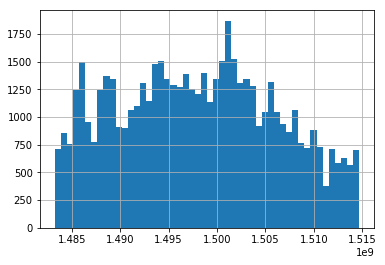

In [12]:
# visualizatins of various fields and weather events
df['daily.time'].hist(bins=50)

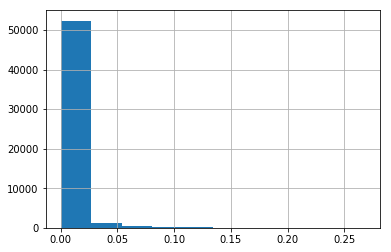

In [13]:
df['current.precipIntensity'].hist()

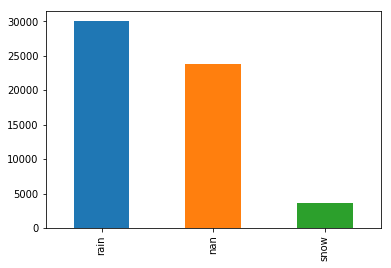

In [16]:
df['daily.precipType'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

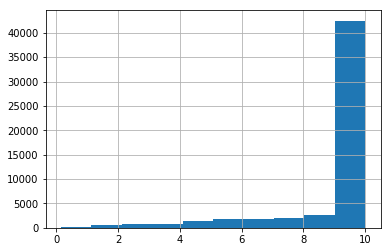

In [14]:
df['current.visibility'].hist(bins=10)

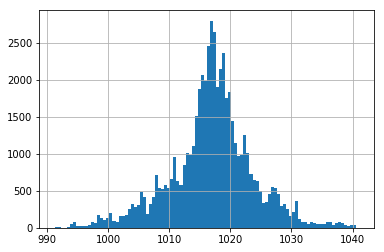

In [15]:
df['current.pressure'].hist(bins=100)

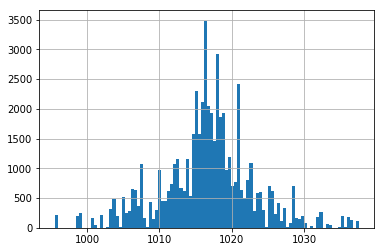

In [16]:
df['daily.pressure'].hist(bins=100)

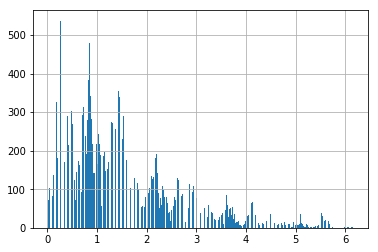

In [17]:
df['daily.windSpeed'].hist(bins=1000)

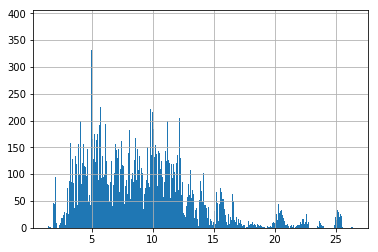

In [18]:
df['daily.windGust'].hist(bins=1000)

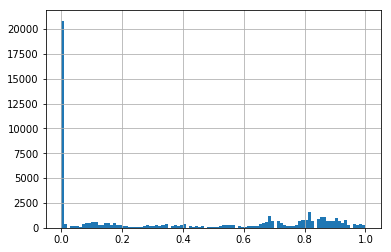

In [19]:
df['daily.precipProbability'].hist(bins=100)

In [4]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False)

Clear                      25160
Overcast                   16127
Mostly Cloudy              13707
Partly Cloudy              10920
NaN                         3724
Light Rain                  3684
Drizzle                     3494
Rain                        1012
Foggy                        770
Flurries                     665
Light Snow                   161
Humid and Mostly Cloudy      139
Humid and Partly Cloudy      110
Humid and Overcast            95
Light Sleet                   53
Humid                         20
Snow                           9
Sleet                          1
Heavy Rain                     1
Name: current.summary, dtype: int64

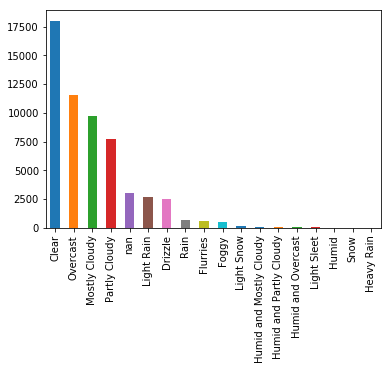

In [25]:
df['current.summary'].value_counts(sort=True, ascending=False, dropna=False).plot.bar()

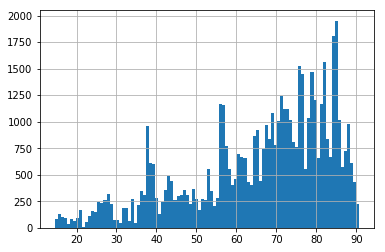

In [21]:
df['daily.temperatureHigh'].hist(bins=100)

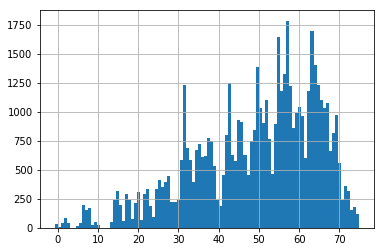

In [22]:
df['daily.temperatureLow'].hist(bins=100)

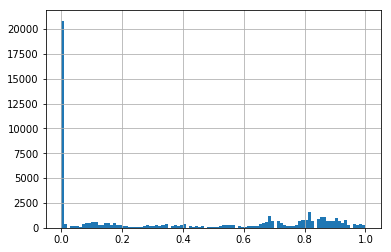

In [27]:
df['daily.precipProbability'].hist(bins=100)

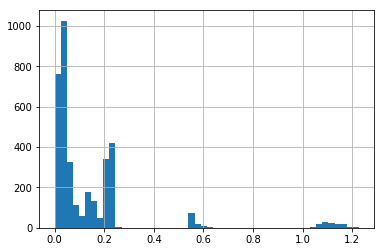

In [25]:
df['daily.precipAccumulation'].hist(bins=50)

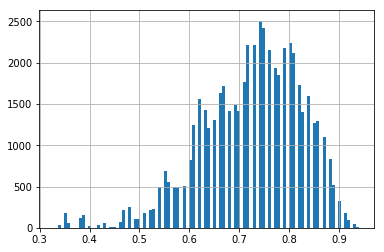

In [26]:
df['daily.humidity'].hist(bins=100)

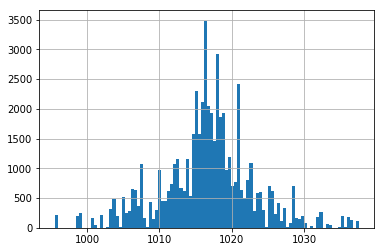

In [28]:
df['daily.pressure'].hist(bins=100)